In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("./diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values present

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Data Visualization

### Heat Map 

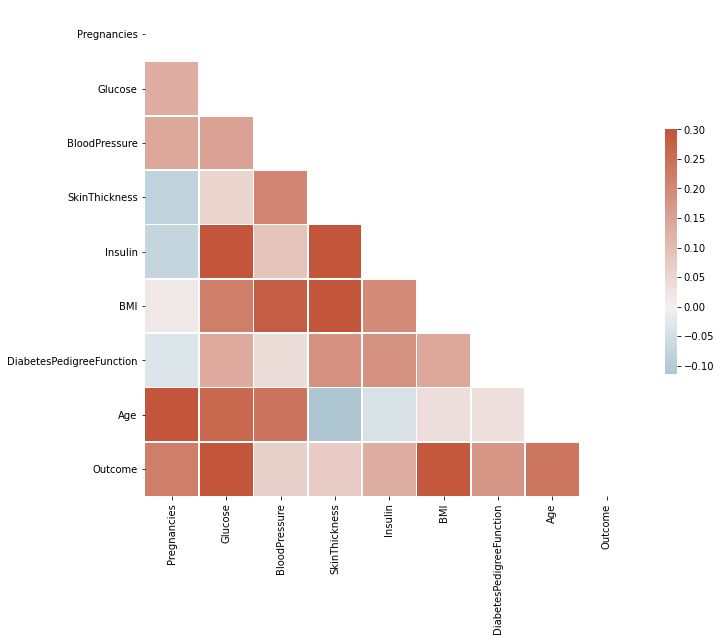

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Count Plot

#### Diabetes

0    500
1    268
Name: Outcome, dtype: int64


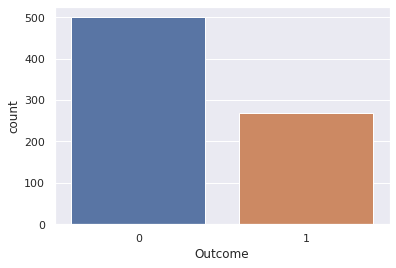

In [11]:
print(df.Outcome.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Outcome")
plt.show()

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pairplot

<Figure size 720x720 with 0 Axes>

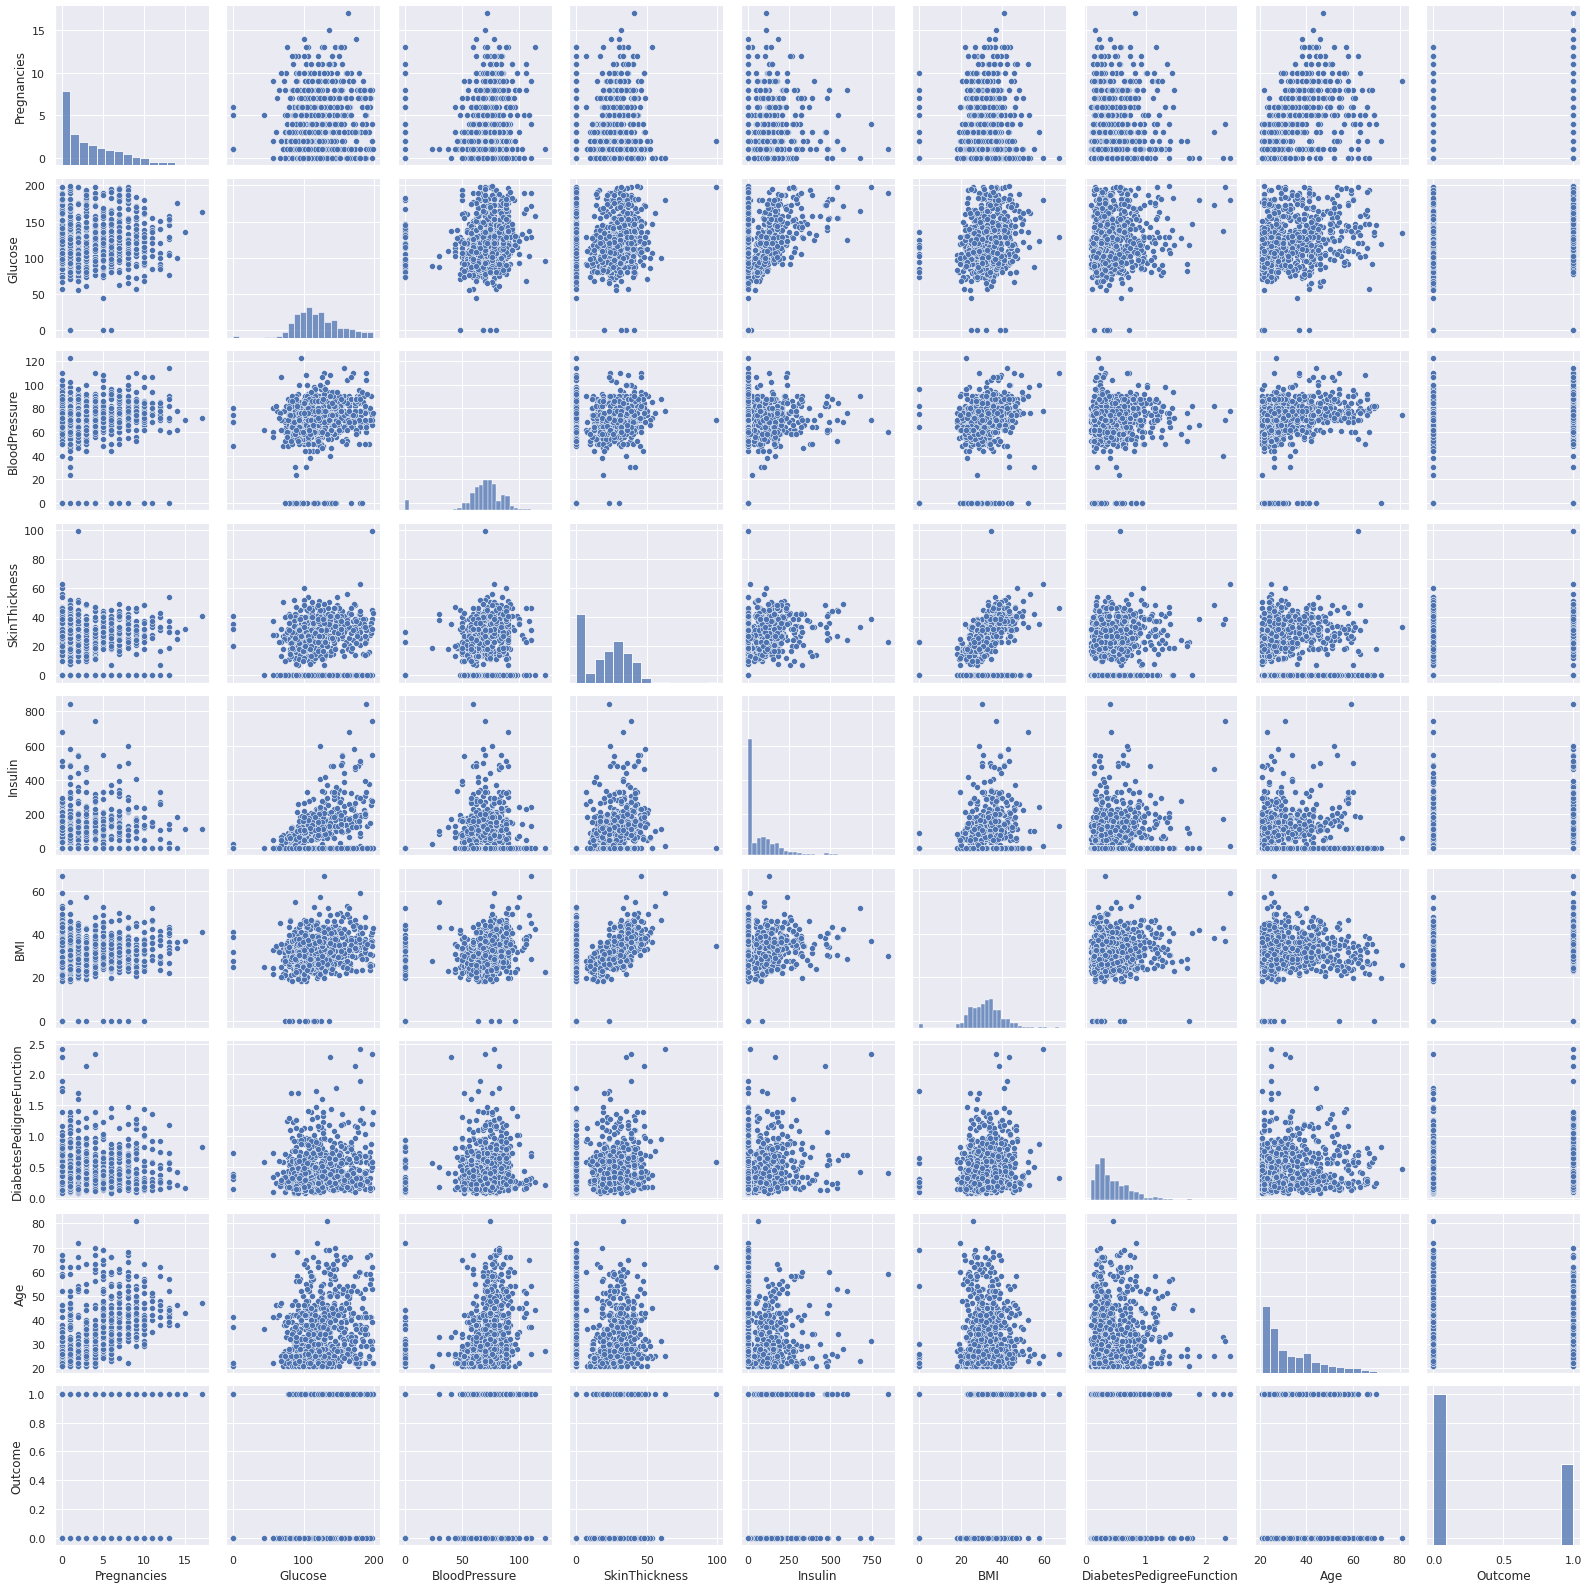

In [13]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

 ## Distribution Plot

### Glucose

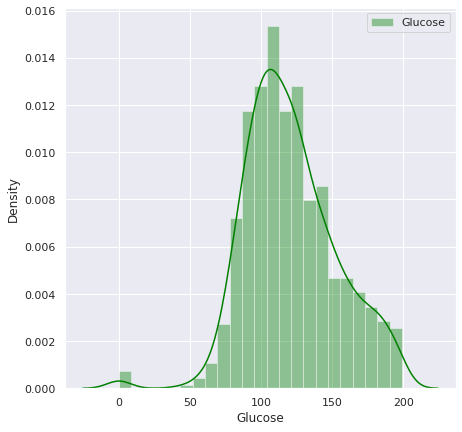

In [14]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.Glucose, color="green", label="Glucose", kde= True)
plt.legend()

### Skin Thickness

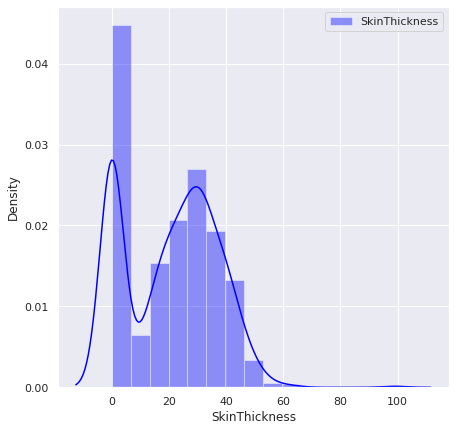

In [15]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.SkinThickness, color="blue", label="SkinThickness", kde= True)
plt.legend()

### Blood Pressure

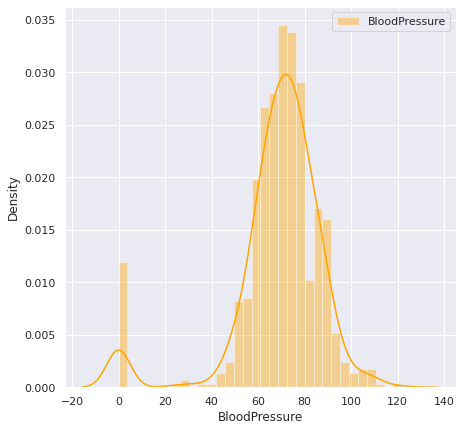

In [16]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.BloodPressure, color="orange", label="BloodPressure", kde= True)
plt.legend()

### BMI

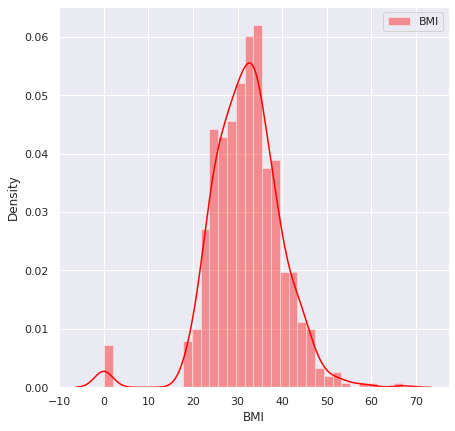

In [17]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.BMI, color="red", label="BMI", kde= True)
plt.legend()

## No Diabetes vs Diabetes by BMI

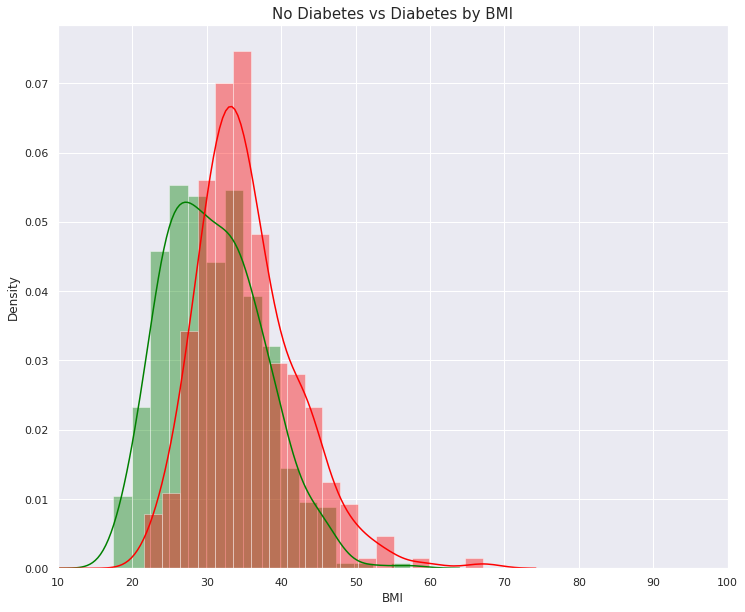

In [18]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['Outcome'] == 0]["BMI"], color='green') # No Diabetes - green
sns.distplot(df[df['Outcome'] == 1]["BMI"], color='red') # Diabetes - Red

plt.title('No Diabetes vs Diabetes by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

Density of overweight people has more diabetes.

## No Diabetes vs Diabetes by Blood Pressure

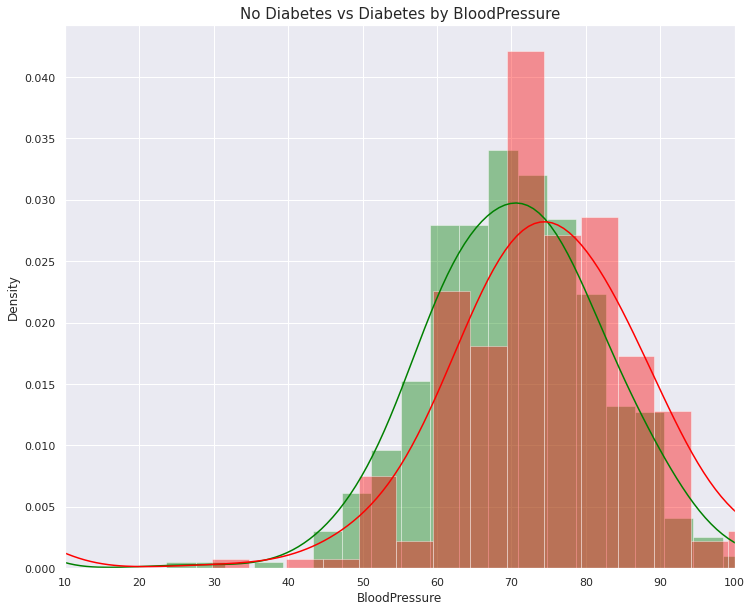

In [19]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['Outcome'] == 0]["BloodPressure"], color='green') # No Diabetes - green
sns.distplot(df[df['Outcome'] == 1]["BloodPressure"], color='red') # Diabetes - Red

plt.title('No Diabetes vs Diabetes by BloodPressure', fontsize=15)
plt.xlim([10,100])
plt.show()

BP having more than 35 has Diabetes.

## No Diabetes vs Diabetes by Age

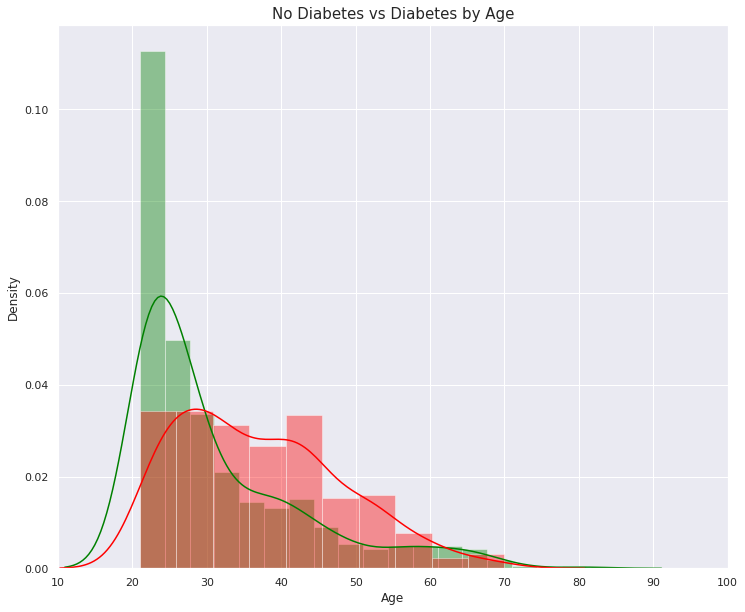

In [20]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['Outcome'] == 0]["Age"], color='green') # No Diabetes - green
sns.distplot(df[df['Outcome'] == 1]["Age"], color='red') # Diabetes - Red

plt.title('No Diabetes vs Diabetes by Age', fontsize=15)
plt.xlim([10,100])
plt.show()

People of age ranging from 30 to 40 are more prone to diabetes.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# ML MODELLING

In [22]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
x.values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [25]:
y.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [26]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (768, 8)
Shape of Y:  (768,)


### Splitting Dataset

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [28]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (614, 8)
Number transactions y_train dataset:  (614,)
Number transactions x_test dataset:  (154, 8)
Number transactions y_test dataset:  (154,)


## Feature Scaling

In [29]:


from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



## Handling Imbalance Data

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 221
Before OverSampling, counts of label '0': 393 

After OverSampling, the shape of train_X: (786, 8)
After OverSampling, the shape of train_y: (786,) 

After OverSampling, counts of label '1': 393
After OverSampling, counts of label '0': 393


## Model Deployment

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [34]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[82 25]
 [11 36]]
Accuracy Score:  0.7662337662337663

K-Fold Validation Mean Accuracy: 73.03 %

Standard Deviation: 3.64 %

ROC AUC Score: 0.77

Precision: 0.59

Recall: 0.77

F1: 0.67
-----------------------------------

SVM :
[[81 26]
 [11 36]]
Accuracy Score:  0.7597402597402597

K-Fold Validation Mean Accuracy: 75.83 %

Standard Deviation: 2.76 %

ROC AUC Score: 0.76

Precision: 0.58

Recall: 0.77

F1: 0.66
-----------------------------------

KNeighbors :
[[78 29]
 [16 31]]
Accuracy Score:  0.7077922077922078

K-Fold Validation Mean Accuracy: 78.27 %

Standard Deviation: 5.54 %

ROC AUC Score: 0.69

Precision: 0.52

Recall: 0.66

F1: 0.58
-----------------------------------

GaussianNB :
[[86 21]
 [15 32]]
Accuracy Score:  0.7662337662337663

K-Fold Validation Mean Accuracy: 71.23 %

Standard Deviation: 4.33 %

ROC AUC Score: 0.74

Precision: 0.60

Recall: 0.68

F1: 0.64
-----------------------------------

BernoulliNB :
[[78 29]
 [14 33]]
Accuracy Score:  

In [35]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [36]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [37]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,XGBoost,80.519481,78.518338,5.483907,0.812090,0.639344,0.829787,0.722222
6,Random Forest,77.272727,82.332035,4.018643,0.746968,0.615385,0.680851,0.646465
0,Logistic Regreesion,76.623377,73.028238,3.638739,0.766156,0.590164,0.765957,0.666667
3,GaussianNB,76.623377,71.230120,4.332770,0.742295,0.603774,0.680851,0.640000
1,SVM,75.974026,75.830899,2.756410,0.761483,0.580645,0.765957,0.660550
5,Decision Tree,73.376623,76.488153,6.008051,0.712965,0.553571,0.659574,0.601942
4,BernoulliNB,72.077922,70.353781,4.852064,0.715550,0.532258,0.702128,0.605505
2,KNeighbors,70.779221,78.270042,5.542316,0.694273,0.516667,0.659574,0.579439


## Model Tuning

In [38]:


from sklearn.model_selection import GridSearchCV



In [39]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [40]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
Best Accuracy : 73.03%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
Best Accuracy : 78.27%
Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5}

----------------

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
Best Accuracy : 75.83%
Best Parameters 

Here, we can see that **RandomForest** and **XGBoost** has the best classification accuracy and seems to be the best fit for the model.

## Random Forest

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       107
           1       0.62      0.68      0.65        47

    accuracy                           0.77       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.78      0.77      0.78       154

ROC AUC score: 0.8525551799562537
Accuracy Score:  0.7727272727272727


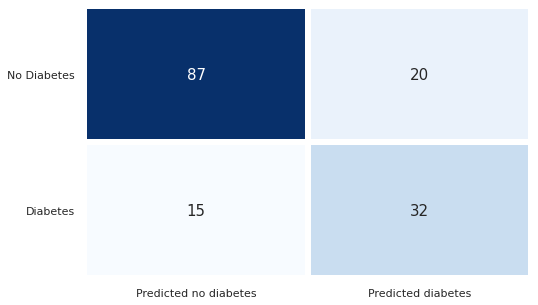

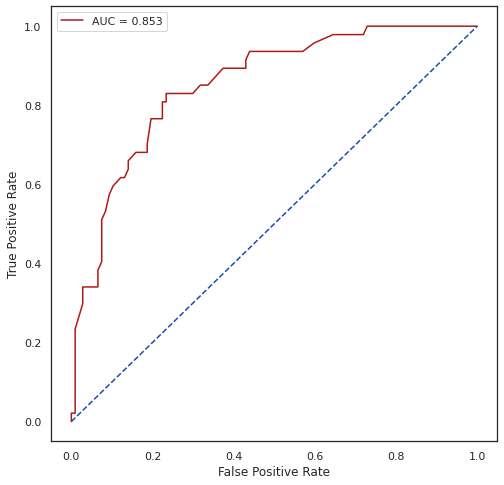

In [41]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Diabetes', 'Diabetes'], xticklabels = ['Predicted no diabetes', 'Predicted diabetes'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## XGBoost

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       107
           1       0.64      0.83      0.72        47

    accuracy                           0.81       154
   macro avg       0.78      0.81      0.79       154
weighted avg       0.83      0.81      0.81       154

ROC AUC score: 0.8590176973553392
Accuracy Score:  0.8051948051948052


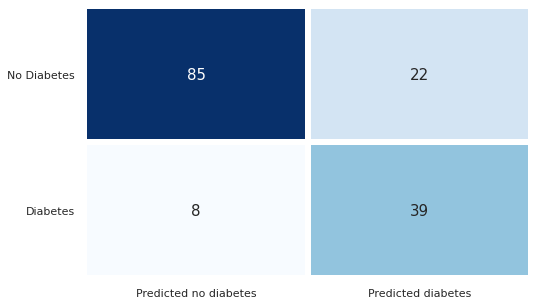

Text(0.5, 0, 'False Positive Rate')

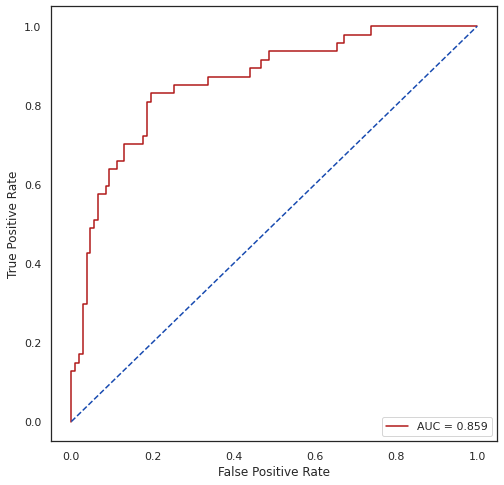

In [42]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Diabetes', 'Diabetes'], xticklabels = ['Predicted no diabetes', 'Predicted diabetes'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Conclusion

After evaluating several model performance we can conclude that **XGBoost** is the best fit model for diabetes prediction.